# Initialization

In [1]:
from safedigital import temperature as TR
from safedigital import gas_pressure as GP
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
from datetime import datetime
from scipy import optimize
sns.set(color_codes=True)
cur_dir = r'c:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics'
print(cur_dir)

c:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics


# 20220902
Constant current 630A
## data clean

In [2]:
# test_date = '20220902'
# test_id = '_TR_SA12kV_SGCC_DV_Cable_Bushing_630A'
# path_data_clean = '%s\\%s%s\\1_Data formatted\\%s_data_clean_5min.csv' % (cur_dir,test_date,test_id,test_date)
# sync_df = TR.DataClean.data_clean_resample(cur_dir, test_date, test_id, sample_time='5min')
# sync_df.to_csv(path_data_clean)

## curve fitting to find time constant

Temperature balance time is 2022-09-02 17:20:00.
just balanced TempRise 37.0
max TempRise 37.5
tw is 37.5
time constant T of is 114.36132472342628
RMSE is  0.7127453463725417


114.36132472342628

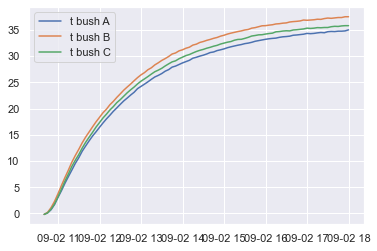

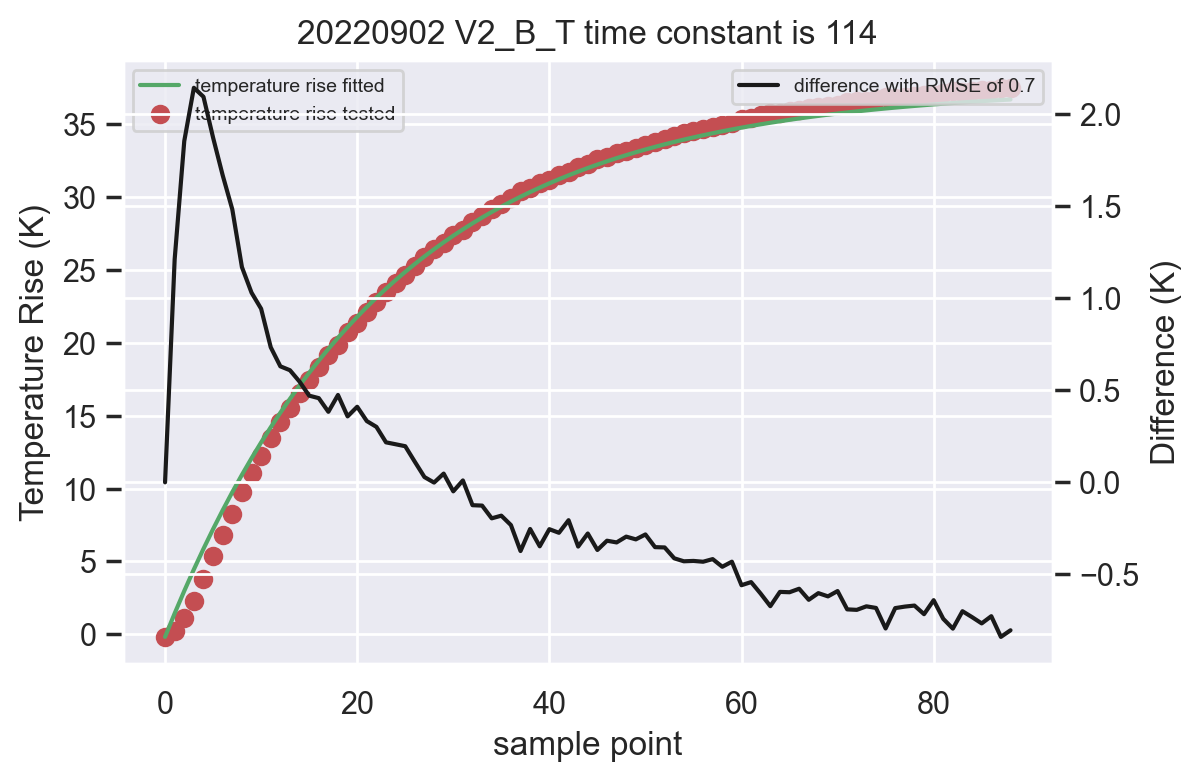

In [3]:
test_date = '20220902'
test_id = '_TR_SA12kV_SGCC_DV_Cable_Bushing_630A'
sample_time = 5 # sampling time in minutes
sample_cyc_1h = int(60 / sample_time) # sampling cycles in 1 hour
path_data = '{0}\\{1}{2}\\1_Data formatted\\{1}_data_clean_5min.csv'.format(cur_dir, 
																			test_date,
																			test_id)
data_df = pd.read_csv(path_data, header=0)
data_df.index = [datetime.strptime(data_df.iloc[i, 0], 
								   '%Y-%m-%d %H:%M:%S') 
								   for i in range(len(data_df))]

# average ambient temp in all dates
data_df['t_oil_avg'] = (data_df['t_oil_bottle_4'].values +
						data_df['t_oil_bottle_3'].values +
						data_df['t_oil_bottle_2'].values +
						data_df['t_oil_bottle_1'].values * 4) / 4  

# def find balance index
col_list = ['t_V2_phA_bushing', 't_V2_phB_bushing', 't_V2_phC_bushing',
			't_V2=_phA_joint', 't_V2=_phB_joint', 't_V2=_phC_joint',
			't_V2_phA_joint', 't_V2_phB_joint', 't_V2_phC_joint',
			't_V2_arc_room_left_down',
			't_V2_arc_room_right_up', 't_V2_arc_room_right_down',
			't_D1_arc_room_left_up', 't_D1_arc_room_left_down',
			't_D1_arc_room_right_up', 't_D1_arc_room_right_down',
			't_oil_bottle_4', 't_oil_bottle_3', 't_oil_bottle_2',
       		't_oil_bottle_1']
bal_idx = TR.DynTempRise.find_bal_idx(data_df, 
									  col_list, 
									  sample_min=5)
print('just balanced TempRise', 
      data_df.loc[bal_idx, 'V2_B_T'] - 
	  data_df.loc[bal_idx, 't_oil_avg'])
max_tr_20220902 = max(data_df.loc[:, 'V2_B_T'] - 
					  data_df.loc[:, 't_oil_avg'])
print('max TempRise', 
	  max_tr_20220902)
plt.plot(data_df['V2_A_T'] - data_df['t_oil_avg'], 
		 label='t bush A')
plt.plot(data_df['V2_B_T'] - data_df['t_oil_avg'], 
		 label='t bush B')
plt.plot(data_df['V2_C_T'] - data_df['t_oil_avg'], 
		 label='t bush C')
plt.legend()

# def cal_time_const
col_name = 'V2_B_T'
TR.DynTempRise.cal_time_const(data_df, 
							  col_name, 
							  date=test_date)


# 20220913
Constant current 100A
## data clean

In [4]:
# test_date = '20220913'
# test_id = '_DTR_SA12kV_SGCC_DV_Cable_Bushing_100A'
# path_data_clean = '%s\\%s%s\\1_Data formatted\\%s_data_clean_5min.csv' % (cur_dir,test_date,test_id,test_date)
# sync_df = TR.DataClean.data_clean_resample(cur_dir, 
# 										   test_date, 
# 										   test_id, 
# 										   sample_time='5min',
# 										   datetime_format='%Y/%m/%d:%H:%M:%S')
# sync_df.to_csv(path_data_clean)

## curve fitting to find time constant

Temperature balance time is 2022-09-13 15:45:00.
just balanced TempRise 1.3000000000000007
max TempRise 1.5
tw is 1.5
time constant T of is 147.65786968300986
RMSE is  0.04969193224611654


147.65786968300986

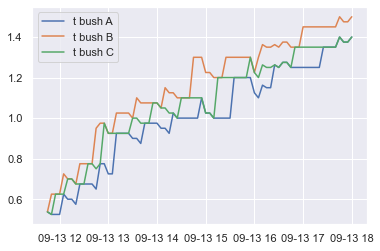

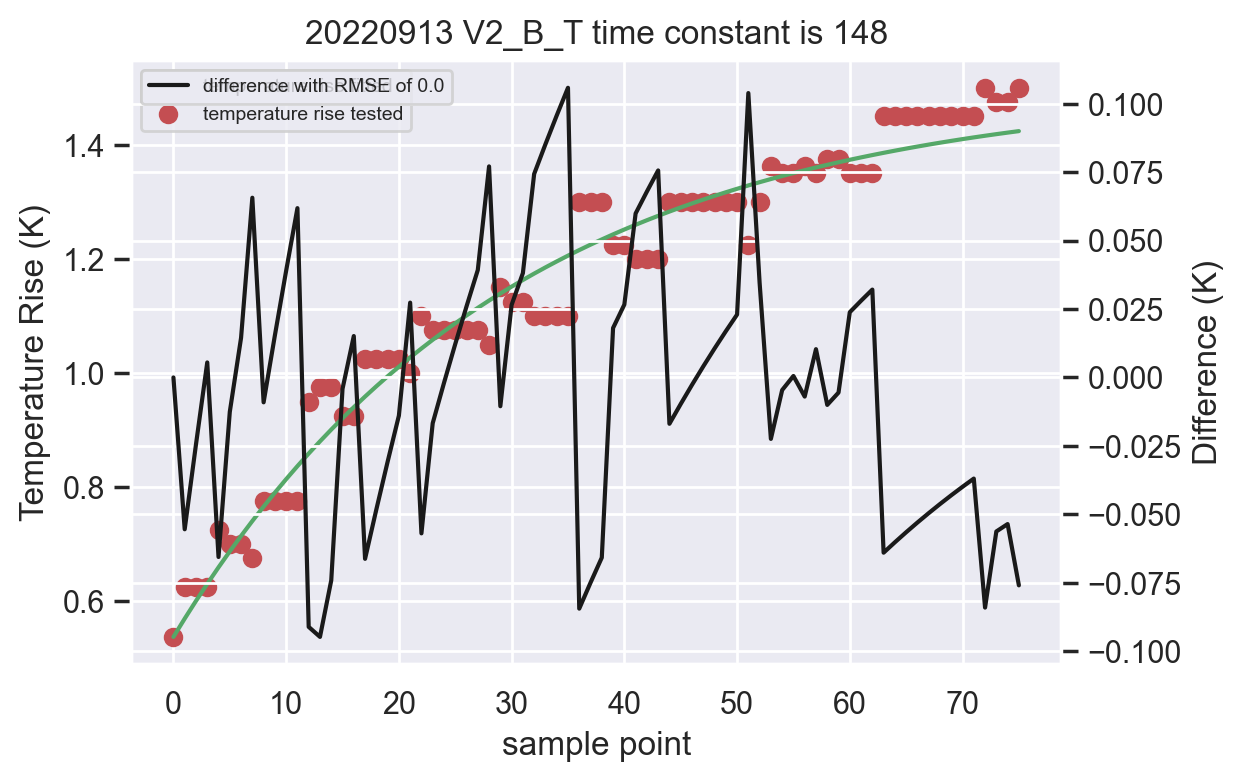

In [5]:
test_date = '20220913'
test_id = '_DTR_SA12kV_SGCC_DV_Cable_Bushing_100A'
sample_time = 5 # sampling time in minutes
sample_cyc_1h = int(60 / sample_time) # sampling cycles in 1 hour
path_data = '{0}\\{1}{2}\\1_Data formatted\\{1}_data_clean_5min.csv'.format(cur_dir, 
																			test_date,
																			test_id)
data_df = pd.read_csv(path_data, header=0)
data_df.index = [datetime.strptime(data_df.iloc[i, 0], 
								   '%Y-%m-%d %H:%M:%S') 
								   for i in range(len(data_df))]

# average ambient temp in all dates
data_df['t_oil_avg'] = (data_df['t_oil_bottle_4'].values +
						data_df['t_oil_bottle_3'].values +
						data_df['t_oil_bottle_2'].values +
						data_df['t_oil_bottle_1'].values * 4) / 4  

# def find balance index
col_list = ['t_V2_phA_bushing', 't_V2_phB_bushing', 't_V2_phC_bushing',
			't_V2=_phA_joint', 't_V2=_phB_joint', 't_V2=_phC_joint',
			't_V2_phA_joint', 't_V2_phB_joint', 't_V2_phC_joint',
			't_V2_arc_room_left_down',
			't_V2_arc_room_right_up', 't_V2_arc_room_right_down',
			't_D1_arc_room_left_up', 't_D1_arc_room_left_down',
			't_D1_arc_room_right_up', 't_D1_arc_room_right_down',
			't_oil_bottle_4', 't_oil_bottle_3', 't_oil_bottle_2',
       		't_oil_bottle_1']
bal_idx = TR.DynTempRise.find_bal_idx(data_df, col_list, sample_min=5)
print('just balanced TempRise', 
      data_df.loc[bal_idx, 'V2_B_T'] - 
	  data_df.loc[bal_idx, 't_oil_avg'])
max_tr_20220913 = max(data_df.loc[:, 'V2_B_T'] - 
					  data_df.loc[:, 't_oil_avg'])
print('max TempRise', 
       max(data_df.loc[:, 'V2_B_T'] - 
	  	   data_df.loc[:, 't_oil_avg']))
plt.plot(data_df['V2_A_T'] - data_df['t_oil_avg'], label='t bush A')
plt.plot(data_df['V2_B_T'] - data_df['t_oil_avg'], label='t bush B')
plt.plot(data_df['V2_C_T'] - data_df['t_oil_avg'], label='t bush C')
plt.legend()

# def cal_time_const
col_name = 'V2_B_T'
TR.DynTempRise.cal_time_const(data_df, 
													col_name,
													date=test_date)


# 20220914
Constant current 200A
## data clean

In [6]:
# test_date = '20220914'
# test_id = '_DTR_SA12kV_SGCC_DV_Cable_Bushing_200A'
# path_data_clean = '%s\\%s%s\\1_Data formatted\\%s_data_clean_5min.csv' % (cur_dir, 
# 																		  test_date,
# 																		  test_id,
# 																		  test_date)
# sync_df = TR.DataClean.data_clean_resample(cur_dir, 
# 										   test_date, 
# 										   test_id, 
# 										   sample_time='5min',
# 										   datetime_format='%Y/%m/%d:%H:%M:%S')
# sync_df.to_csv(path_data_clean)

## find time constant

Temperature balance time is 2022-09-14 13:05:00.
just balanced TempRise 4.675000000000004
max TempRise 5.450000000000003
tw is 5.450000000000003
time constant T of is 136.29366869994539
RMSE is  0.15355817277811665


136.29366869994539

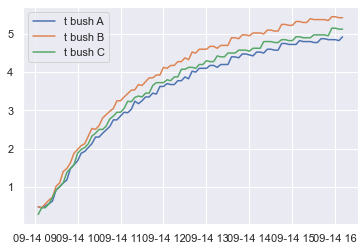

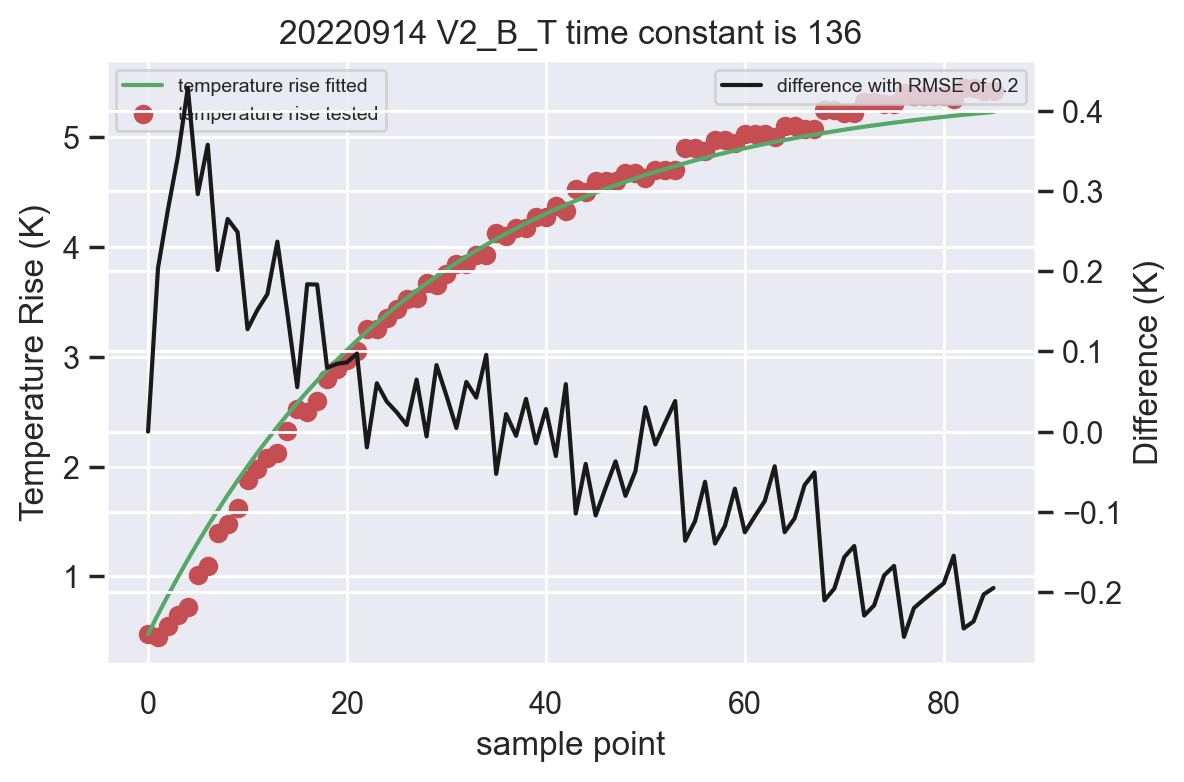

In [7]:
test_date = '20220914'
test_id = '_DTR_SA12kV_SGCC_DV_Cable_Bushing_200A'
sample_time = 5 # sampling time in minutes
sample_cyc_1h = int(60 / sample_time) # sampling cycles in 1 hour
path_data = '{0}\\{1}{2}\\1_Data formatted\\{1}_data_clean_5min.csv'.format(cur_dir, 
																			test_date,
																			test_id)
data_df = pd.read_csv(path_data, header=0)
data_df.index = [datetime.strptime(data_df.iloc[i, 0], 
								   '%Y-%m-%d %H:%M:%S') 
								   for i in range(len(data_df))]

# average ambient temp in all dates
data_df['t_oil_avg'] = (data_df['t_oil_bottle_4'].values +
						data_df['t_oil_bottle_3'].values +
						data_df['t_oil_bottle_2'].values +
						data_df['t_oil_bottle_1'].values * 4) / 4  

# def find balance index
col_list = ['t_V2_phA_bushing', 't_V2_phB_bushing', 't_V2_phC_bushing',
			't_V2=_phA_joint', 't_V2=_phB_joint', 't_V2=_phC_joint',
			't_V2_phA_joint', 't_V2_phB_joint', 't_V2_phC_joint',
			't_V2_arc_room_left_down',
			't_V2_arc_room_right_up', 't_V2_arc_room_right_down',
			't_D1_arc_room_left_up', 't_D1_arc_room_left_down',
			't_D1_arc_room_right_up', 't_D1_arc_room_right_down',
			't_oil_bottle_4', 't_oil_bottle_3', 't_oil_bottle_2',
       		't_oil_bottle_1']
bal_idx = TR.DynTempRise.find_bal_idx(data_df, col_list, sample_min=5)
print('just balanced TempRise', 
      data_df.loc[bal_idx, 'V2_B_T'] - 
	  data_df.loc[bal_idx, 't_oil_avg'])
max_tr_20220914 = max(data_df.loc[:, 'V2_B_T'] - 
					  data_df.loc[:, 't_oil_avg'])
print('max TempRise', 
       max(data_df.loc[:, 'V2_B_T'] - 
	  	   data_df.loc[:, 't_oil_avg']))
plt.plot(data_df['V2_A_T'] - data_df['t_oil_avg'], label='t bush A')
plt.plot(data_df['V2_B_T'] - data_df['t_oil_avg'], label='t bush B')
plt.plot(data_df['V2_C_T'] - data_df['t_oil_avg'], label='t bush C')
plt.legend()

# def cal_time_const
col_name = 'V2_B_T'
TR.DynTempRise.cal_time_const(data_df, 
							  col_name, 
							  date=test_date)


# 20220915
Constant current 300A
## data clean

In [8]:
# test_date = '20220915'
# test_id = '_DTR_SA12kV_SGCC_DV_Cable_Bushing_300A'
# path_data_clean = '%s\\%s%s\\1_Data formatted\\%s_data_clean_5min.csv' % (cur_dir,test_date,test_id,test_date)
# sync_df = TR.DataClean.data_clean_resample(cur_dir, 
# 										   test_date, 
# 										   test_id, 
# 										   sample_time='5min',
# 										   datetime_format='%Y/%m/%d:%H:%M:%S')
# sync_df.to_csv(path_data_clean)

## find time constant

Temperature balance time is 2022-09-15 13:50:00.
just balanced TempRise 10.175000000000004
max TempRise 11.399999999999999
tw is 11.399999999999999
time constant T of is 128.76053811862712
RMSE is  0.15671113757230457


128.76053811862712

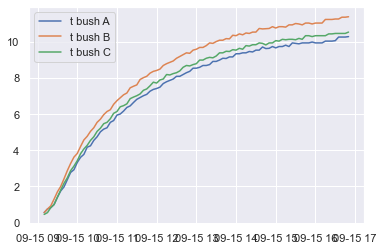

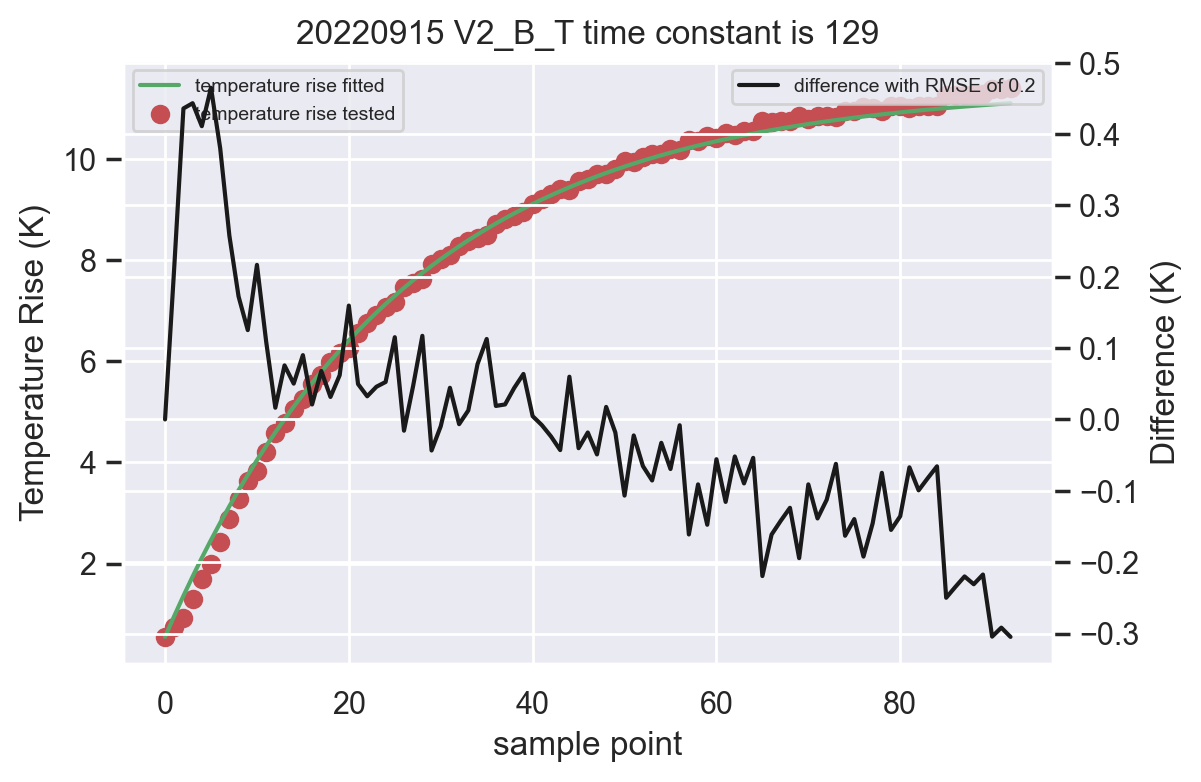

In [9]:
test_date = '20220915'
test_id = '_DTR_SA12kV_SGCC_DV_Cable_Bushing_300A'
sample_time = 5 # sampling time in minutes
sample_cyc_1h = int(60 / sample_time) # sampling cycles in 1 hour
path_data = '{0}\\{1}{2}\\1_Data formatted\\{1}_data_clean_5min.csv'.format(cur_dir, 
																			test_date,
																			test_id)
data_df = pd.read_csv(path_data, header=0)
data_df.index = [datetime.strptime(data_df.iloc[i, 0], 
								   '%Y-%m-%d %H:%M:%S') 
								   for i in range(len(data_df))]

# average ambient temp in all dates
data_df['t_oil_avg'] = (data_df['t_oil_bottle_4'].values +
						data_df['t_oil_bottle_3'].values +
						data_df['t_oil_bottle_2'].values +
						data_df['t_oil_bottle_1'].values * 4) / 4  

# def find balance index
col_list = ['t_V2_phA_bushing', 't_V2_phB_bushing', 't_V2_phC_bushing',
			't_V2=_phA_joint', 't_V2=_phB_joint', 't_V2=_phC_joint',
			't_V2_phA_joint', 't_V2_phB_joint', 't_V2_phC_joint',
			't_V2_arc_room_left_down',
			't_V2_arc_room_right_up', 't_V2_arc_room_right_down',
			't_D1_arc_room_left_up', 't_D1_arc_room_left_down',
			't_D1_arc_room_right_up', 't_D1_arc_room_right_down',
			't_oil_bottle_4', 't_oil_bottle_3', 't_oil_bottle_2',
       		't_oil_bottle_1']
bal_idx = TR.DynTempRise.find_bal_idx(data_df, col_list, sample_min=5)
print('just balanced TempRise', 
      data_df.loc[bal_idx, 'V2_B_T'] - 
	  data_df.loc[bal_idx, 't_oil_avg'])
max_tr_20220915 = max(data_df.loc[:, 'V2_B_T'] - 
					  data_df.loc[:, 't_oil_avg'])
print('max TempRise', 
       max(data_df.loc[:, 'V2_B_T'] - 
	  	   data_df.loc[:, 't_oil_avg']))
plt.plot(data_df['V2_A_T'] - data_df['t_oil_avg'], label='t bush A')
plt.plot(data_df['V2_B_T'] - data_df['t_oil_avg'], label='t bush B')
plt.plot(data_df['V2_C_T'] - data_df['t_oil_avg'], label='t bush C')
plt.legend()

# def cal_time_const
col_name = 'V2_B_T'
TR.DynTempRise.cal_time_const(data_df, 
							  col_name,
							  date=test_date)


# 20220916
Constant current 500A
## data clean

In [10]:
# test_date = '20220916'
# test_id = '_DTR_SA12kV_SGCC_DV_Cable_Bushing_500A'
# path_data_clean = '%s\\%s%s\\1_Data formatted\\%s_data_clean_5min.csv' % (cur_dir,test_date,test_id,test_date)
# sync_df = TR.DataClean.data_clean_resample(cur_dir, 
# 										   test_date, 
# 										   test_id, 
# 										   sample_time='5min',
# 										   datetime_format='%Y/%m/%d:%H:%M:%S')
# sync_df.to_csv(path_data_clean)

## find time constant

Temperature balance time is 2022-09-16 15:40:00.
just balanced TempRise 26.075
max TempRise 26.375
tw is 26.375
time constant T of is 115.85328042365846
RMSE is  0.6088617471884534


115.85328042365846

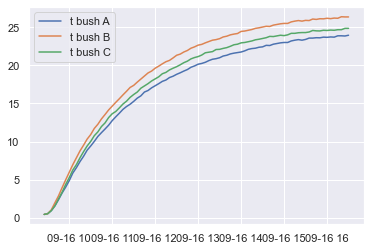

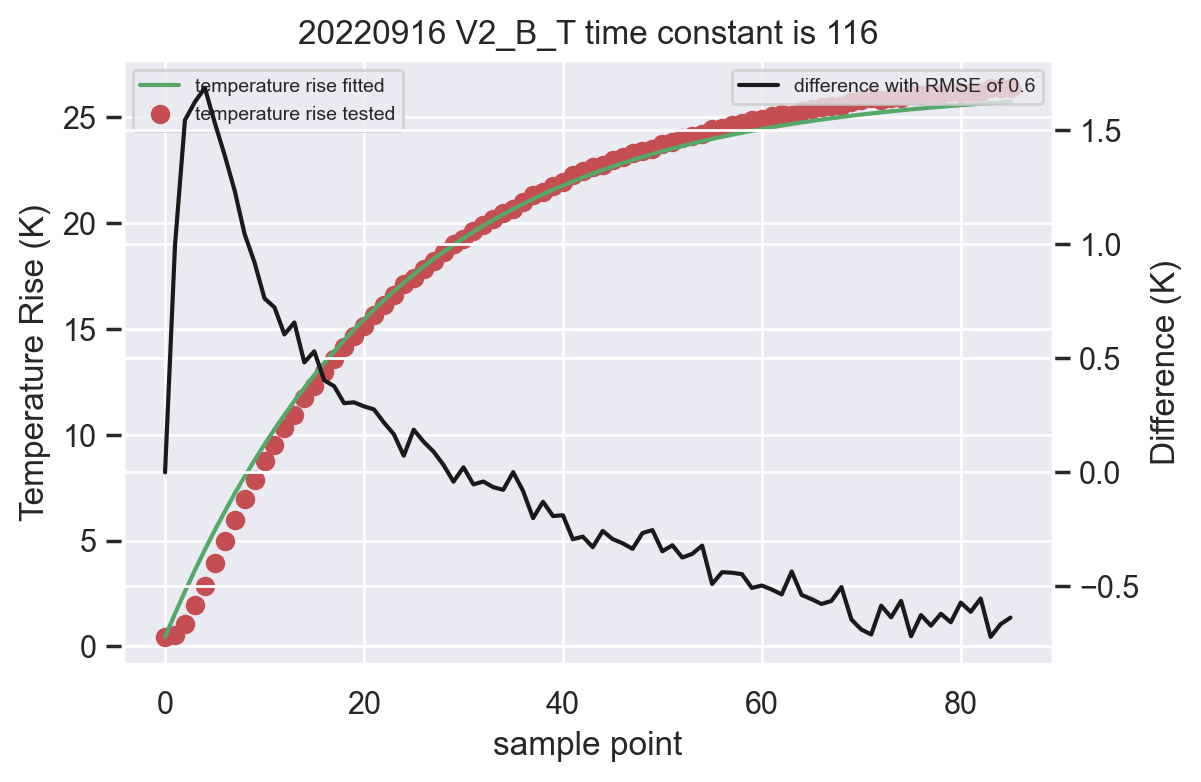

In [11]:
test_date = '20220916'
test_id = '_DTR_SA12kV_SGCC_DV_Cable_Bushing_500A'
sample_time = 5 # sampling time in minutes
sample_cyc_1h = int(60 / sample_time) # sampling cycles in 1 hour
path_data = '{0}\\{1}{2}\\1_Data formatted\\{1}_data_clean_5min.csv'.format(cur_dir, 
																			test_date,
																			test_id)
data_df = pd.read_csv(path_data, header=0)
data_df.index = [datetime.strptime(data_df.iloc[i, 0], 
								   '%Y-%m-%d %H:%M:%S') 
								   for i in range(len(data_df))]

# average ambient temp in all dates
data_df['t_oil_avg'] = (data_df['t_oil_bottle_4'].values +
						data_df['t_oil_bottle_3'].values +
						data_df['t_oil_bottle_2'].values +
						data_df['t_oil_bottle_1'].values * 4) / 4  

# def find balance index
col_list = ['t_V2_phA_bushing', 't_V2_phB_bushing', 't_V2_phC_bushing',
			't_V2=_phA_joint', 't_V2=_phB_joint', 't_V2=_phC_joint',
			't_V2_phA_joint', 't_V2_phB_joint', 't_V2_phC_joint',
			't_V2_arc_room_left_down',
			't_V2_arc_room_right_up', 't_V2_arc_room_right_down',
			't_D1_arc_room_left_up', 't_D1_arc_room_left_down',
			't_D1_arc_room_right_up', 't_D1_arc_room_right_down',
			't_oil_bottle_4', 't_oil_bottle_3', 't_oil_bottle_2',
       		't_oil_bottle_1']
bal_idx = TR.DynTempRise.find_bal_idx(data_df, col_list, sample_min=5)
print('just balanced TempRise', 
      data_df.loc[bal_idx, 'V2_B_T'] - 
	  data_df.loc[bal_idx, 't_oil_avg'])
max_tr_20220916 = max(data_df.loc[:, 'V2_B_T'] - 
					  data_df.loc[:, 't_oil_avg'])
print('max TempRise', 
       max(data_df.loc[:, 'V2_B_T'] - 
	  	   data_df.loc[:, 't_oil_avg']))
plt.plot(data_df['V2_A_T'] - data_df['t_oil_avg'], label='t bush A')
plt.plot(data_df['V2_B_T'] - data_df['t_oil_avg'], label='t bush B')
plt.plot(data_df['V2_C_T'] - data_df['t_oil_avg'], label='t bush C')
plt.legend()

# def cal_time_const
col_name = 'V2_B_T'
TR.DynTempRise.cal_time_const(data_df, 
							  col_name,
							  date=test_date)


# 20220917
Constant current 400A
## data clean

In [12]:
# test_date = '20220917'
# test_id = '_DTR_SA12kV_SGCC_DV_Cable_Bushing_400A'
# path_data_clean = '%s\\%s%s\\1_Data formatted\\%s_data_clean_5min.csv' % (cur_dir,test_date,test_id,test_date)
# sync_df = TR.DataClean.data_clean_resample(cur_dir, 
# 										   test_date, 
# 										   test_id, 
# 										   sample_time='5min',
# 										   datetime_format='%Y/%m/%d:%H:%M:%S')
# sync_df.to_csv(path_data_clean)

## find time constant

Temperature balance time is 2022-09-17 14:25:00.
just balanced TempRise 17.575000000000003
max TempRise 18.425
tw is 18.425
time constant T of is 120.63089807581768
RMSE is  0.2671756597029884


120.63089807581768

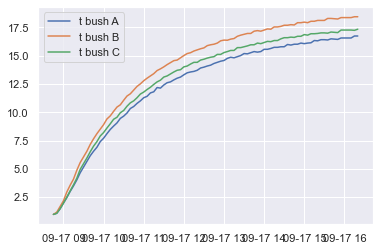

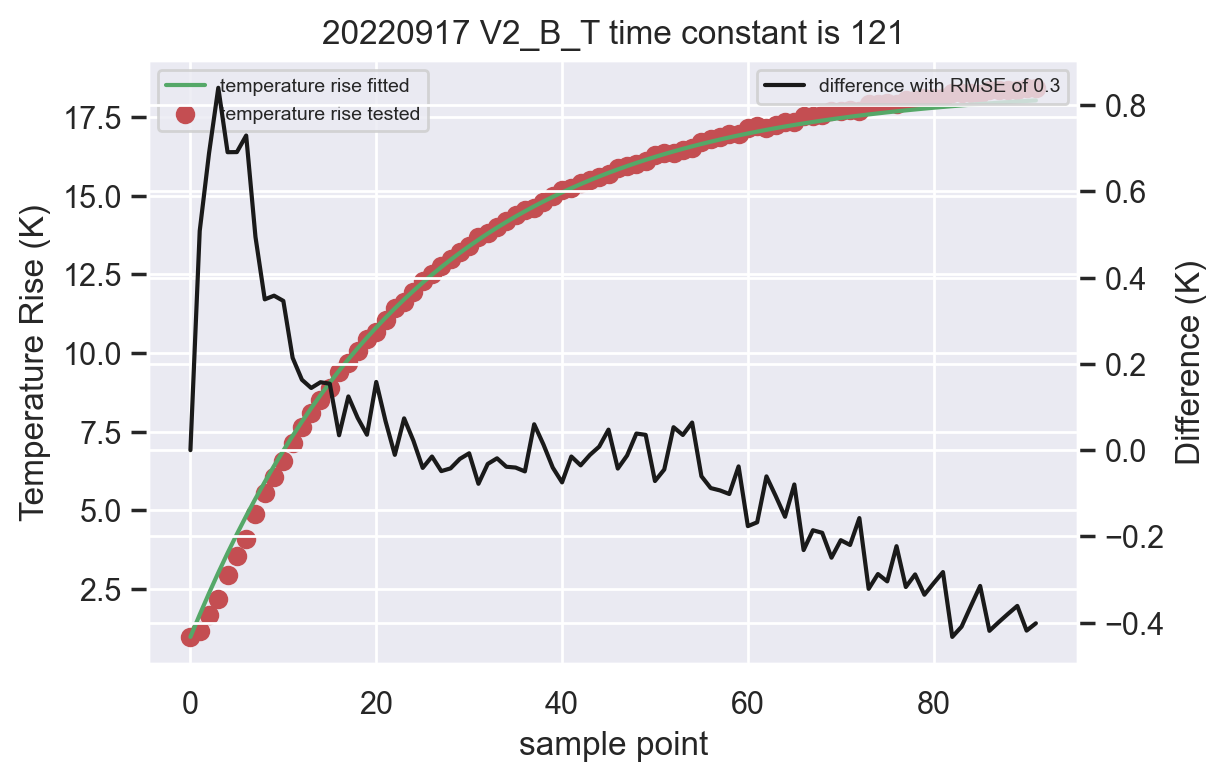

In [13]:
test_date = '20220917'
test_id = '_DTR_SA12kV_SGCC_DV_Cable_Bushing_400A'
sample_time = 5 # sampling time in minutes
sample_cyc_1h = int(60 / sample_time) # sampling cycles in 1 hour
path_data = '{0}\\{1}{2}\\1_Data formatted\\{1}_data_clean_5min.csv'.format(cur_dir, 
																			test_date,
																			test_id)
data_df = pd.read_csv(path_data, header=0)
data_df.index = [datetime.strptime(data_df.iloc[i, 0], 
								   '%Y-%m-%d %H:%M:%S') 
								   for i in range(len(data_df))]

# average ambient temp in all dates
data_df['t_oil_avg'] = (data_df['t_oil_bottle_4'].values +
						data_df['t_oil_bottle_3'].values +
						data_df['t_oil_bottle_2'].values +
						data_df['t_oil_bottle_1'].values * 4) / 4  

# def find balance index
col_list = ['t_V2_phA_bushing', 't_V2_phB_bushing', 't_V2_phC_bushing',
			't_V2=_phA_joint', 't_V2=_phB_joint', 't_V2=_phC_joint',
			't_V2_phA_joint', 't_V2_phB_joint', 't_V2_phC_joint',
			't_V2_arc_room_left_down',
			't_V2_arc_room_right_up', 't_V2_arc_room_right_down',
			't_D1_arc_room_left_up', 't_D1_arc_room_left_down',
			't_D1_arc_room_right_up', 't_D1_arc_room_right_down',
			't_oil_bottle_4', 't_oil_bottle_3', 't_oil_bottle_2',
       		't_oil_bottle_1']
bal_idx = TR.DynTempRise.find_bal_idx(data_df, col_list, sample_min=5)
print('just balanced TempRise', 
      data_df.loc[bal_idx, 'V2_B_T'] - 
	  data_df.loc[bal_idx, 't_oil_avg'])
max_tr_20220917 = max(data_df.loc[:, 'V2_B_T'] - 
					  data_df.loc[:, 't_oil_avg'])
print('max TempRise', 
       max(data_df.loc[:, 'V2_B_T'] - 
	  	   data_df.loc[:, 't_oil_avg']))
plt.plot(data_df['V2_A_T'] - data_df['t_oil_avg'], label='t bush A')
plt.plot(data_df['V2_B_T'] - data_df['t_oil_avg'], label='t bush B')
plt.plot(data_df['V2_C_T'] - data_df['t_oil_avg'], label='t bush C')
plt.legend()

# def cal_time_const
col_name = 'V2_B_T'
TR.DynTempRise.cal_time_const(data_df, 
							  col_name,
							  date=test_date)


# Find Conversion Const

conversion constant a is 1.6019854486462017


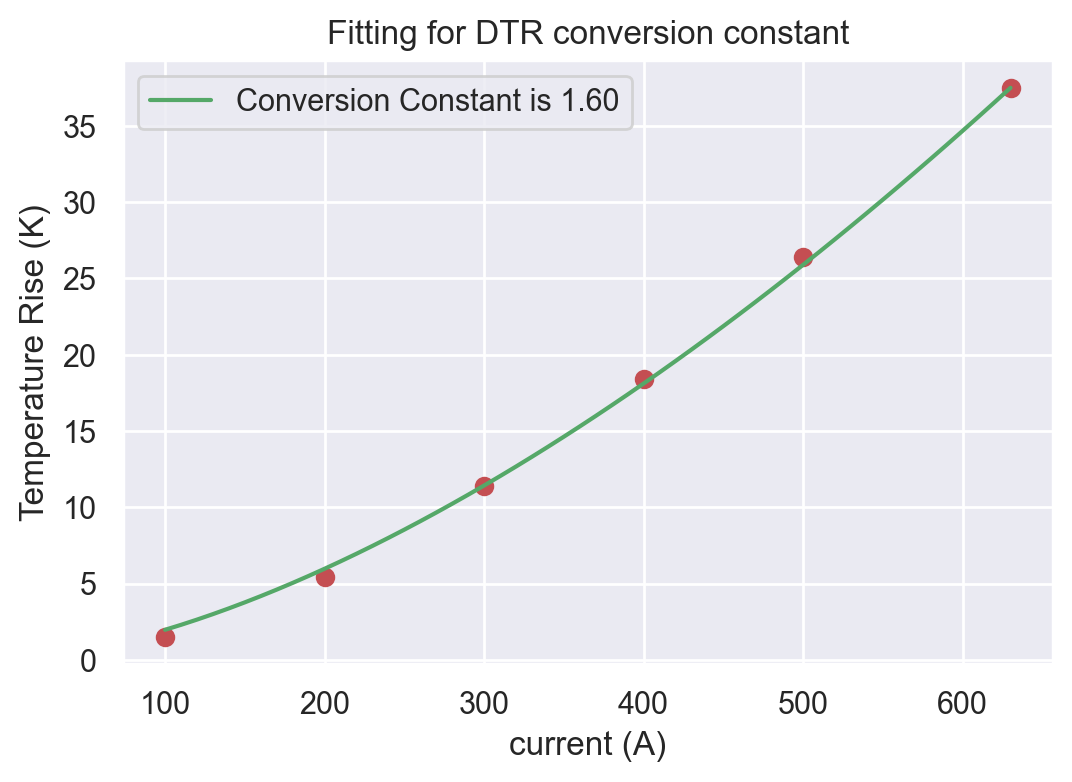

In [14]:
tr_list = [max_tr_20220902, max_tr_20220913, max_tr_20220914,
		   max_tr_20220915, max_tr_20220916, max_tr_20220917]
cur_list = [630, 100, 200, 300, 500, 400]		   
conver_const = TR.DynTempRise.cal_dynamic_conver_const(cur_list,
													   tr_list,
													   max_tr_20220902)

# 20221009
current drop, 1 hour interval

## data clean

In [15]:
# test_date = '20221009'
# test_id = '_DTR_GP_SA12kV_SGCC_DV_Bushing_Current_Drop'
# path_data_clean = '%s\\%s%s\\1_Data formatted\\%s_data_clean_5min.csv' % (cur_dir,test_date,test_id,test_date)
# sync_df = TR.DataClean.data_clean_resample(cur_dir, 
# 										   test_date, 
# 										   test_id, 
# 										   sample_time='5min',
# 										   datetime_format='%Y/%m/%d:%H:%M:%S')
# sync_df.to_csv(path_data_clean)

## DTR simulation

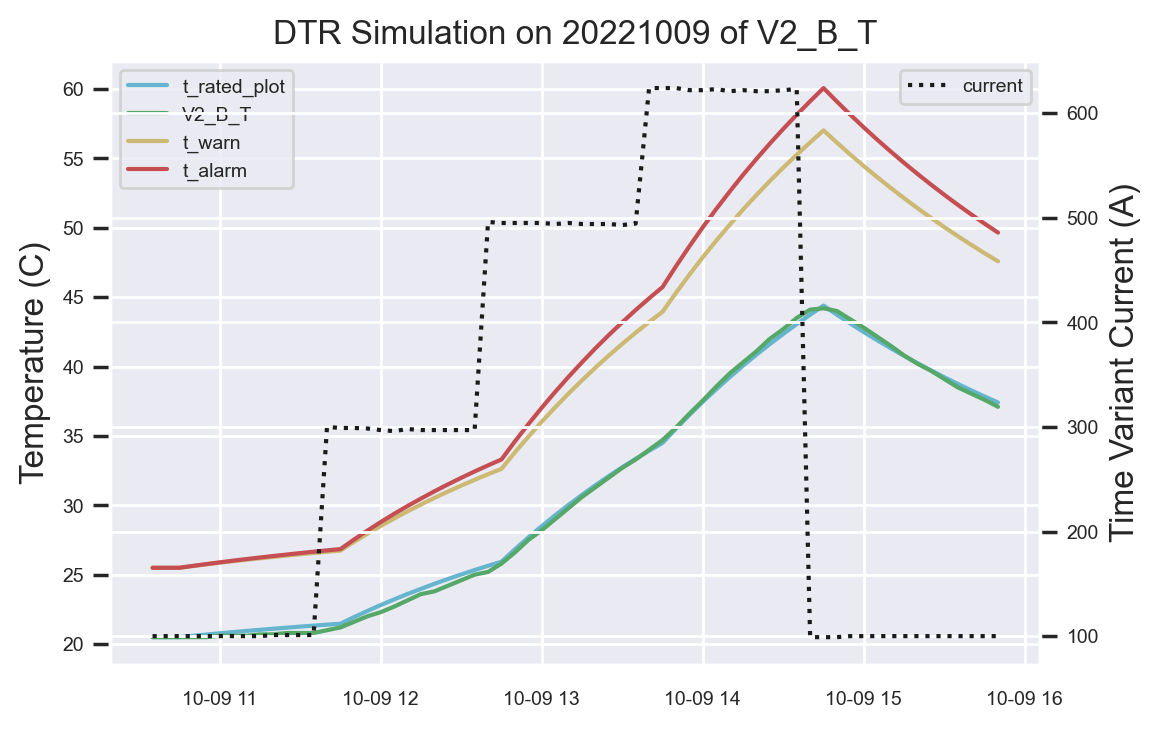

In [16]:
# load clean data 
test_date = '20221009'
test_id = '_DTR_GP_SA12kV_SGCC_DV_Bushing_Current_Drop'
path_data = '{0}\\{1}{2}\\1_Data formatted\\{1}_data_clean_5min.csv'.format(cur_dir, 
																			test_date,
																			test_id)
data_df = pd.read_csv(path_data, header=0)
data_df.index = [datetime.strptime(data_df.iloc[i, 0], 
								   '%Y-%m-%d %H:%M:%S') 
								   for i in range(len(data_df))]

# keywords arguments list
col_name = 'V2_B_T'
cur_col_name = 'Unit1_B_Cur'
tr_rated = 37.5
tr_warn = 50
tr_alarm = 55
correction_warn = 5
correction_alarm = 5
time_const = 115 # minutes
time_const_drop = 150 # minutes
conver_const = 1.6
# current = data_df[cur_col_name]
delay_const = 2
TR.DynTempRise.dtr_sim_plot(data_df, 
                            col_name, 
                            cur_col_name,
                            tr_rated,
                            tr_warn,
                            tr_alarm,
                            time_const,
                            conver_const,
                            time_const_drop=time_const_drop,
                            delay_const=delay_const,
                            title='DTR Simulation on {} of {}'.format(test_date, col_name))


# 20221010
variant current, time interval of 30min, 15min, 45min

## Data clean

In [17]:
# test_date = '20221010'
# test_id = '_DTR_GP_SA12kV_SGCC_DV_Bushing_Current_Variant'
# path_data_clean = '%s\\%s%s\\1_Data formatted\\%s_data_clean_5min.csv' % (cur_dir,test_date,test_id,test_date)
# sync_df = TR.DataClean.data_clean_resample(cur_dir, 
# 										   test_date, 
# 										   test_id, 
# 										   sample_time='5min',
# 										   datetime_format='%Y/%m/%d:%H:%M:%S')
# sync_df.to_csv(path_data_clean)

## DTR simulation

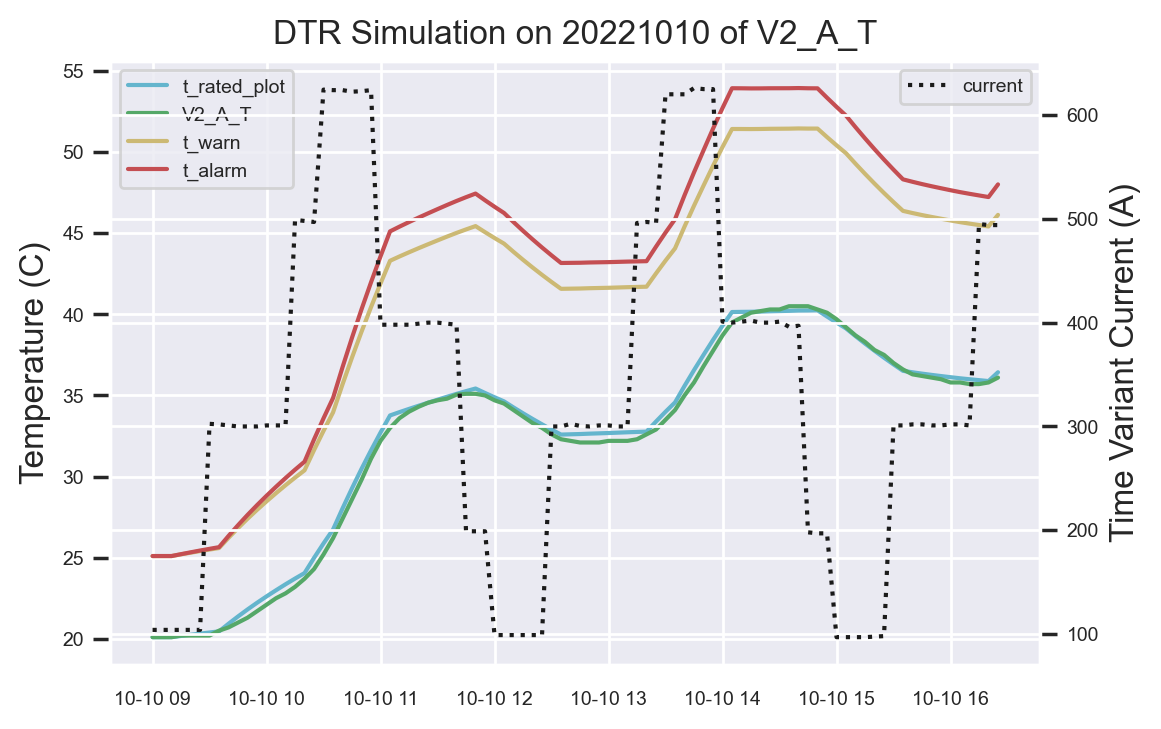

In [18]:
# load clean data 
test_date = '20221010'
test_id = '_DTR_GP_SA12kV_SGCC_DV_Bushing_Current_Variant'
path_data = '{0}\\{1}{2}\\1_Data formatted\\{1}_data_clean_5min.csv'.format(cur_dir, 
																			test_date,
																			test_id)
data_df = pd.read_csv(path_data, header=0)
data_df.index = [datetime.strptime(data_df.iloc[i, 0], 
								   '%Y-%m-%d %H:%M:%S') 
								   for i in range(len(data_df))]

# keywords arguments list
col_name = 'V2_A_T'
cur_col_name = 'Unit1_B_Cur'
tr_rated = 37.5
tr_warn = 50
tr_alarm = 55
correction_warn = 5
correction_alarm = 5
time_const = 115 # minutes
time_const_drop = 150 # minutes
conver_const = 1.6
# current = data_df[cur_col_name]
delay_const = 2
TR.DynTempRise.dtr_sim_plot(data_df, 
                            col_name, 
                            cur_col_name,
                            tr_rated,
                            tr_warn,
                            tr_alarm,
                            time_const,
                            conver_const,
                            time_const_drop=time_const_drop,
                            delay_const=delay_const,
                            title='DTR Simulation on {} of {}'.format(test_date, col_name))


# 20221011
variant current with a time interval of 10mins

## Data clean

In [19]:
# test_date = '20221011'
# test_id = '_DTR_GP_SA12kV_SGCC_DV_Bushing_Current_Variant'
# path_data_clean = '%s\\%s%s\\1_Data formatted\\%s_data_clean_5min.csv' % (cur_dir,test_date,test_id,test_date)
# sync_df = TR.DataClean.data_clean_resample(cur_dir, 
# 										   test_date, 
# 										   test_id, 
# 										   sample_time='5min',
# 										   datetime_format='%Y/%m/%d:%H:%M:%S')
# sync_df.to_csv(path_data_clean)

## DTR Simulation

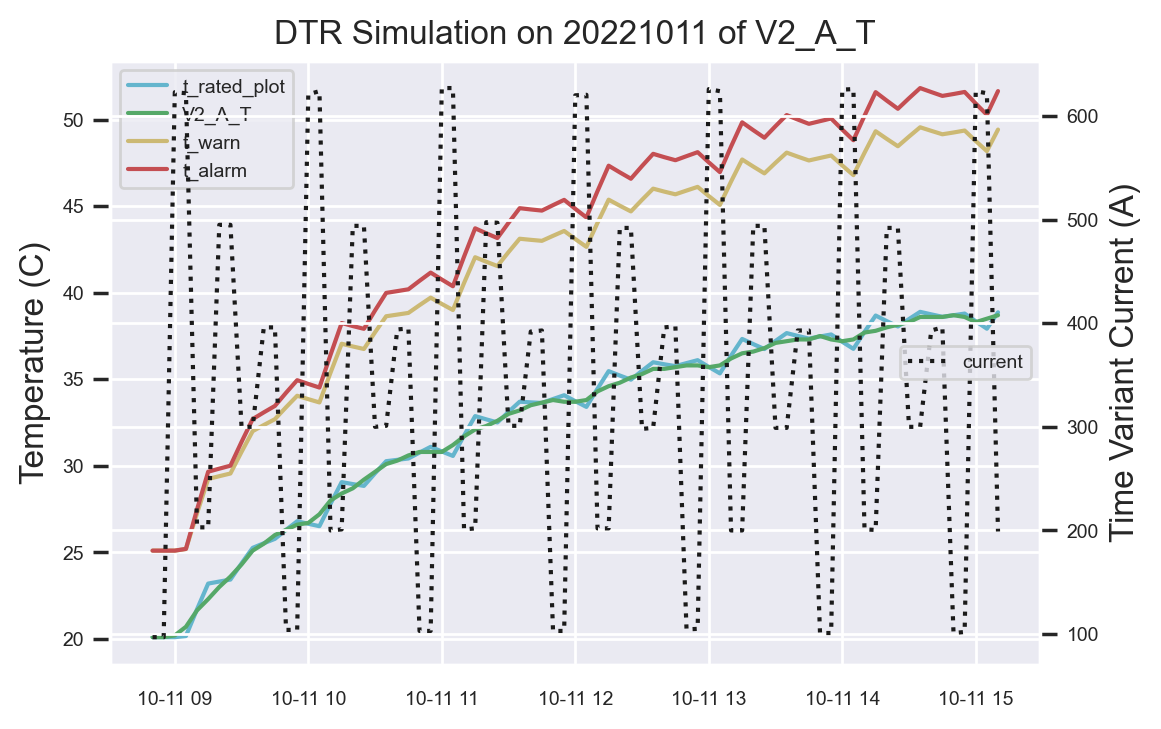

In [20]:
# load clean data 
test_date = '20221011'
test_id = '_DTR_GP_SA12kV_SGCC_DV_Bushing_Current_Variant'
path_data = '{0}\\{1}{2}\\1_Data formatted\\{1}_data_clean_5min.csv'.format(cur_dir, 
																			test_date,
																			test_id)
data_df = pd.read_csv(path_data, header=0)
data_df.index = [datetime.strptime(data_df.iloc[i, 0], 
								   '%Y-%m-%d %H:%M:%S') 
								   for i in range(len(data_df))]

# keywords arguments list
col_name = 'V2_A_T'
cur_col_name = 'Unit1_A_Cur'
tr_rated = 37.5
tr_warn = 50
tr_alarm = 55
correction_warn = 5
correction_alarm = 5
time_const = 115 # minutes
time_const_drop = 150 # minutes
conver_const = 1.6
# current = data_df[cur_col_name]
delay_const = 2
TR.DynTempRise.dtr_sim_plot(data_df, 
                            col_name, 
                            cur_col_name,
                            tr_rated,
                            tr_warn,
                            tr_alarm,
                            time_const,
                            conver_const,
                            time_const_drop=time_const_drop,
                            delay_const=delay_const,
                            title='DTR Simulation on {} of {}'.format(test_date, col_name))

# 202210117
variant current with PhB fault

## Data clean

In [21]:
# test_date = '20221017'
# test_id = '_DTR_GP_SA12kV_VVV_SGCC_Bushing_Current_Variant_Fault'
# path_data_clean = '%s\\%s%s\\1_Data formatted\\%s_data_clean_5min.csv' % (cur_dir,test_date,test_id,test_date)
# sync_df = TR.DataClean.data_clean_resample(cur_dir, 
# 										   test_date, 
# 										   test_id, 
# 										   sample_time='5min',
# 										   datetime_format='%Y/%m/%d:%H:%M:%S')
# sync_df.to_csv(path_data_clean)

## DTR Simulation

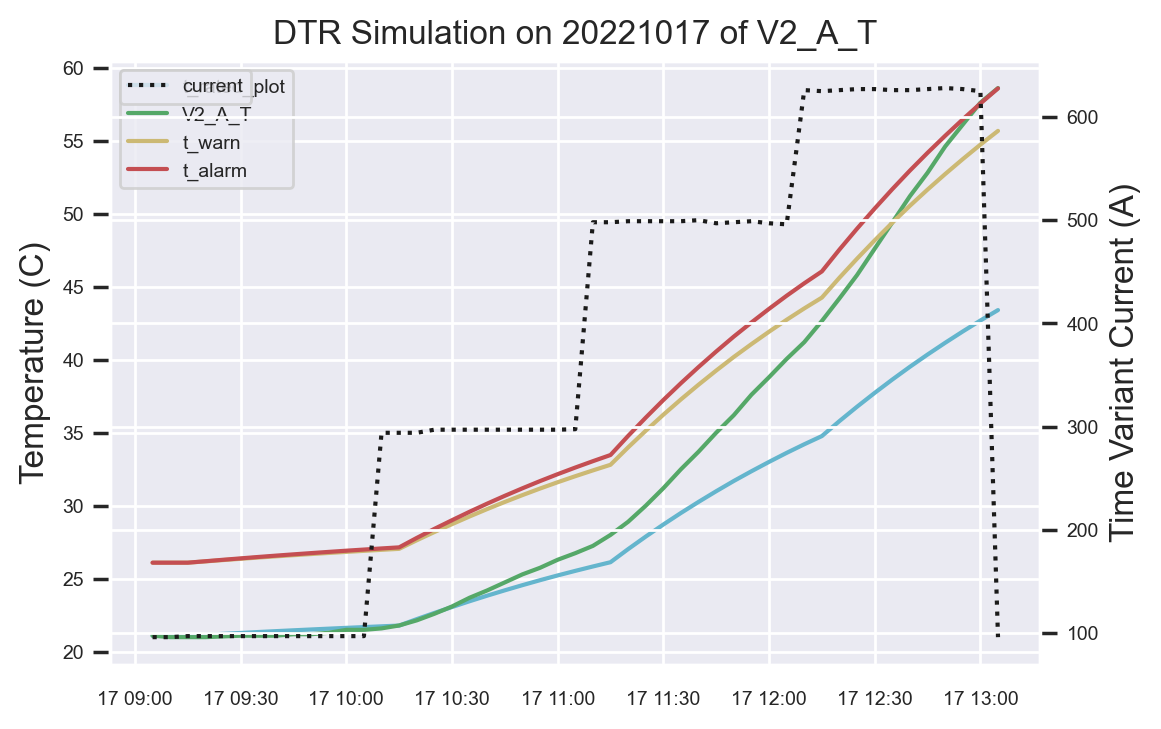

In [22]:
# load clean data 
test_date = '20221017'
test_id = '_DTR_GP_SA12kV_VVV_SGCC_Bushing_Current_Variant_Fault'
path_data = '{0}\\{1}{2}\\1_Data formatted\\{1}_data_clean_5min.csv'.format(cur_dir, 
																			test_date,
																			test_id)
data_df = pd.read_csv(path_data, header=0)
data_df.index = [datetime.strptime(data_df.iloc[i, 0], 
								   '%Y-%m-%d %H:%M:%S') 
								   for i in range(len(data_df))]

# keywords arguments list
col_name = 'V2_A_T'
cur_col_name = 'Unit1_A_Cur'
tr_rated = 37.5
tr_warn = 50
tr_alarm = 55
correction_warn = 5
correction_alarm = 5
time_const = 115 # minutes
time_const_drop = 150 # minutes
conver_const = 1.6
# current = data_df[cur_col_name]
delay_const = 2
TR.DynTempRise.dtr_sim_plot(data_df, 
                            col_name, 
                            cur_col_name,
                            tr_rated,
                            tr_warn,
                            tr_alarm,
                            time_const,
                            conver_const,
                            time_const_drop=time_const_drop,
                            delay_const=delay_const,
                            title='DTR Simulation on {} of {}'.format(test_date, col_name))